### 导入依赖

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


### 定义列名

In [2]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
movie_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url']
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']


### 加载用户维

In [3]:
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=user_cols, encoding='latin-1')
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 加载电影维

In [4]:
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=movie_cols, usecols=range(5), encoding='latin-1')
movies.head()


,movie_id,movie_title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


### 加载电影评分表

In [5]:
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=rating_cols, encoding='latin-1')
ratings.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### 合并三表

In [6]:
data = pd.merge(pd.merge(users, ratings), movies)
data.head()


,user_id,age,gender,occupation,zip_code,movie_id,rating,timestamp,movie_title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


# 数据挖掘

### 电影评价最多 TOP10

In [7]:
status = data.groupby('movie_title').size()
topMovies = status.sort_values(ascending=False)
topMovies[:10]


movie_title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64

### 电影评价最高 TOP10

In [8]:
status = data.groupby('movie_title').agg({'rating': [np.size, np.mean]})
topMovies2 = status[status['rating']['size'] >= 100].sort_values([('rating', 'mean')], ascending=False)
topMovies2[:10]


rating          
                                   size      mean
movie_title                                      
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    583  4.358491
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929

### 年龄分布

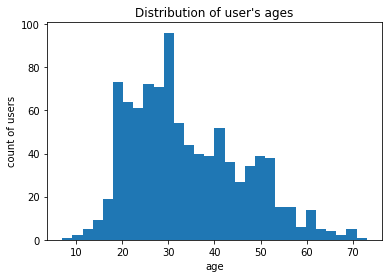

In [9]:
users.age.plot.hist(bins=30)
plt.title('Distribution of user\'s ages')
plt.xlabel('age')
plt.ylabel('count of users')
plt.show()


### 性别分布

In [10]:
gender = users.groupby('gender').size()
gender


gender
F    273
M    670
dtype: int64

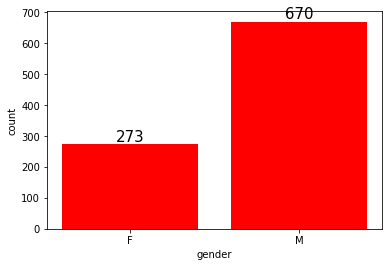

In [11]:
name_list = gender.index
count_list = gender

# 设置柱状图
index = np.arange(len(name_list))
plt.bar(index, count_list, color='r')
for a, b in zip(index, count_list):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=15)

plt.xlabel('gender')
plt.ylabel('count')
plt.xticks(index, name_list)
plt.show()


### 职业分布

In [12]:
occupation = users.groupby('occupation').size()
occupation


occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
dtype: int64

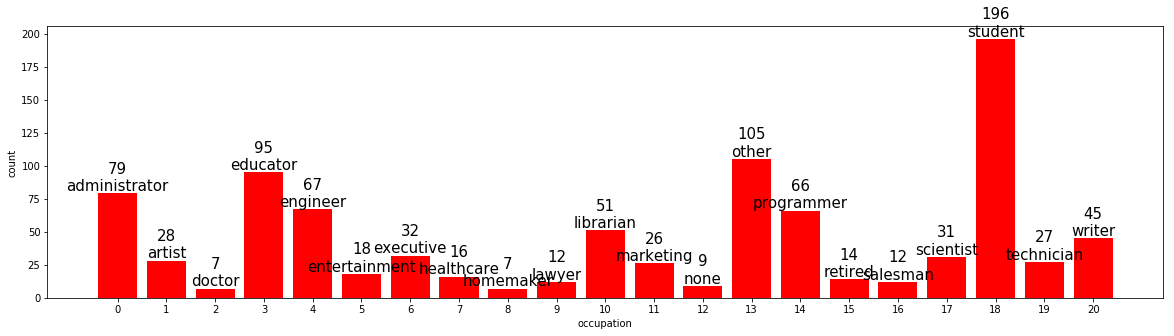

In [13]:
name_list = range(len(occupation.index))
count_list = occupation

# 设置柱状图
index = np.arange(len(name_list))
plt.figure(figsize=(20, 5))
plt.bar(index, count_list, color='r')
for a, b in zip(index, count_list):
    plt.text(a, b, '%d\n%s' % (b, occupation.index[a]), ha='center', va='bottom', fontsize=15)

plt.xlabel('occupation')
plt.ylabel('count')
plt.xticks(index, name_list)
plt.show()


# 推荐系统

### 数据预处理

In [14]:
movie_names = movies.set_index('movie_id')['movie_title'].to_dict()


In [15]:
list(movie_names.items())[:3]


[(1, 'Toy Story (1995)'), (2, 'GoldenEye (1995)'), (3, 'Four Rooms (1995)')]

### 定义模型

In [16]:
from keras.layers import Input, Embedding, Dense, Dropout, Flatten, concatenate
from keras.regularizers import l2
from keras.models import Model
from keras.optimizers import Adam

EMBED_SIZE = 64

def create_embedding(in_num, out_num, input_shape, name):
    x = Input(shape=(1,), dtype='int64', name=name)
    embedding = Embedding(in_num, out_num, input_length=input_shape)(x)
    return x, embedding

ui, ue = create_embedding(len(ratings.user_id.unique()) + 1, EMBED_SIZE, 1, 'ue')
mi, me = create_embedding(len(ratings.movie_id.unique()) + 1, EMBED_SIZE, 1, 'me')

x = concatenate([ue, me])
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)

model = Model([ui, mi], x)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()


Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ue (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
me (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 64)        60416       ue[0][0]                         
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 64)        107712      me[0][0]                         
__________________________________________________________________________________________________
concatenat

### 训练模型

In [17]:
EPOCHS = 10
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.3  # 30% 验证集

model.fit([ratings.user_id, ratings.movie_id], ratings.rating, epochs=EPOCHS, batch_size=BATCH_SIZE,
          validation_split=VALIDATION_SPLIT, shuffle=True)


Train on 70000 samples, validate on 30000 samples
Epoch 1/10
70000/70000 [==============================] - 3s 42us/step - loss: 2.8835 - acc: 0.2829 - val_loss: 1.0111 - val_acc: 0.3776
Epoch 2/10
70000/70000 [==============================] - 3s 39us/step - loss: 1.0456 - acc: 0.3810 - val_loss: 0.9380 - val_acc: 0.3899
Epoch 3/10
70000/70000 [==============================] - 3s 39us/step - loss: 1.0205 - acc: 0.3830 - val_loss: 0.9226 - val_acc: 0.3972
Epoch 4/10
70000/70000 [==============================] - 3s 39us/step - loss: 0.9997 - acc: 0.3877 - val_loss: 0.9092 - val_acc: 0.4011
Epoch 5/10
70000/70000 [==============================] - 3s 39us/step - loss: 0.9831 - acc: 0.3901 - val_loss: 0.9089 - val_acc: 0.3994
Epoch 6/10
70000/70000 [==============================] - 3s 41us/step - loss: 0.9629 - acc: 0.3967 - val_loss: 0.9042 - val_acc: 0.4010
Epoch 7/10
70000/70000 [==============================] - 3s 45us/step - loss: 0.9426 - acc: 0.4006 - val_loss: 0.8981 - val_acc

### 保存模型

In [18]:
from keras.models import load_model

model.save('model.h5')
model = load_model('model.h5')


### 测试模型

```
id	user_id	movie_id	rating	timestamp
0	196	242	3	881250949
1	186	302	3	891717742
2	22	377	1	878887116
3	244	51	2	880606923
4	166	346	1	886397596
```

In [19]:
user_id = 1
movie_id = 1

p = model.predict([np.array([user_id]), np.array([movie_id])])
print('User %d would likely rate movie \'%s\' at %f' % (user_id, movie_names[movie_id], p))


User 1 would likely rate movie 'Toy Story (1995)' at 3.850389


In [20]:
user_id = 1
movie_id = 2

p = model.predict([np.array([user_id]), np.array([movie_id])])
print('User %d would likely rate movie \'%s\' at %f' % (user_id, movie_names[movie_id], p))


User 1 would likely rate movie 'GoldenEye (1995)' at 3.266295


In [21]:
user_id = 2
movie_id = 1

p = model.predict([np.array([user_id]), np.array([movie_id])])
print('User %d would likely rate movie \'%s\' at %f' % (user_id, movie_names[movie_id], p))


User 2 would likely rate movie 'Toy Story (1995)' at 4.013127


In [22]:
user_id = 2
movie_id = 2

p = model.predict([np.array([user_id]), np.array([movie_id])])
print('User %d would likely rate movie \'%s\' at %f' % (user_id, movie_names[movie_id], p))


User 2 would likely rate movie 'GoldenEye (1995)' at 3.429034


### 可视化结果

In [23]:
get_movie_embedding = Model(mi, me)
movie_embeddings = np.squeeze(get_movie_embedding.predict([topMovies]))
movie_embeddings.shape


(1664, 64)

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
movie_pca = pca.fit(movie_embeddings.T).components_
movie_pca.shape


(3, 1664)

In [25]:
fact1 = movie_pca[0]
fact2 = movie_pca[1]
fact3 = movie_pca[2]


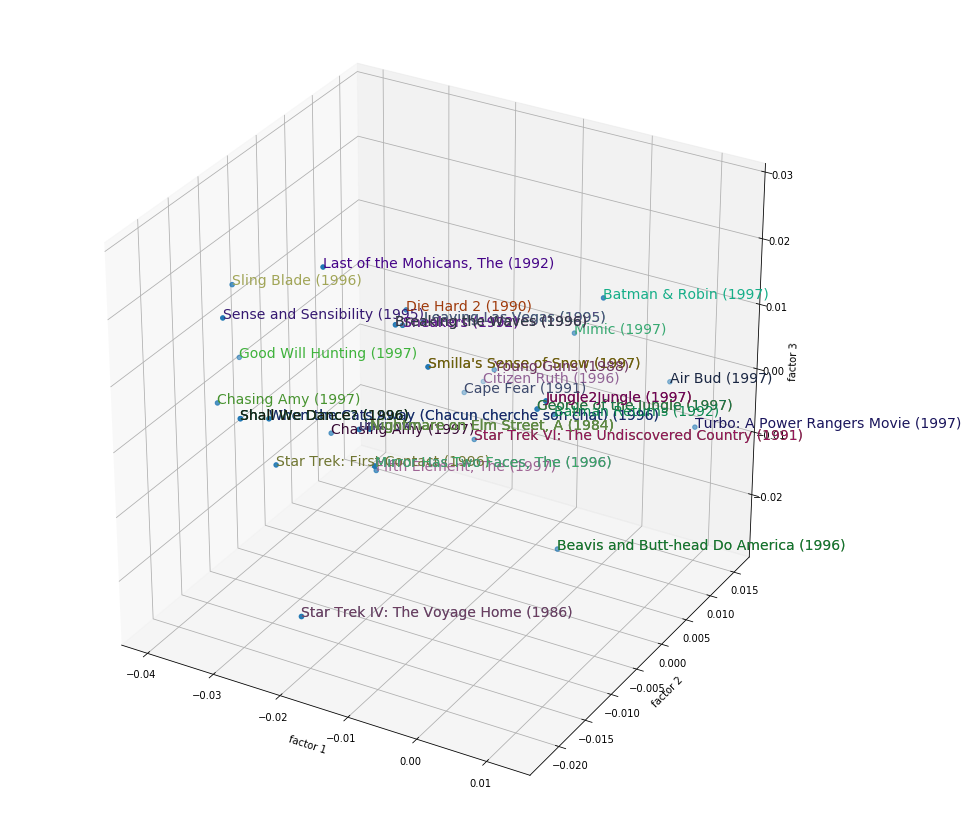

In [26]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

start = 50
end = 100
x_axis = fact1[start:end]
y_axis = fact2[start:end]
z_axis = fact3[start:end]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_axis, y_axis, z_axis)
ax.set_xlabel('factor 1')
ax.set_ylabel('factor 2')
ax.set_zlabel('factor 3')
for i, x, y, z in zip(topMovies[start:end], x_axis, y_axis, z_axis):
    ax.text(x, y, z, movie_names[i], color=np.random.rand(3) * 0.7, fontsize=14)
plt.savefig('docs/3d.png')
plt.show()
